<a href="https://colab.research.google.com/github/anggaagustiratelkom/Machine-Learning/blob/master/Tubes_Machine_Learning_(FIFA20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LIBRARY DAN IMPORT DATASET DARI G-DRIVE**

**IMPORT LIBRARY**

In [0]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import copy as cp
from google.colab import files
sns.set_style("whitegrid")
%matplotlib inline  
sns.set()


**IMPORT DATASET DARI DRIVE KE COLAB**

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**CEK LOKASI KETERSEDIAAN DATABASE DI COLAB**

In [0]:
!ls "drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv"

'drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv'


# **KLASIFIKASI DATASET AKAN DIPAKAI**

**MEMASUKKAN DATASET KE VARIABEL DAN MEMILIH DATASET YANG AKAN DIPAKE**

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv')
dataset = dataset[["height_cm","weight_kg","passing","dribbling","body_type"]]
dataset.head()
dataset.shape

(18278, 5)

**MENGECEK KORELASI ANTAR DATA YANG AKAN DIPAKAI**

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

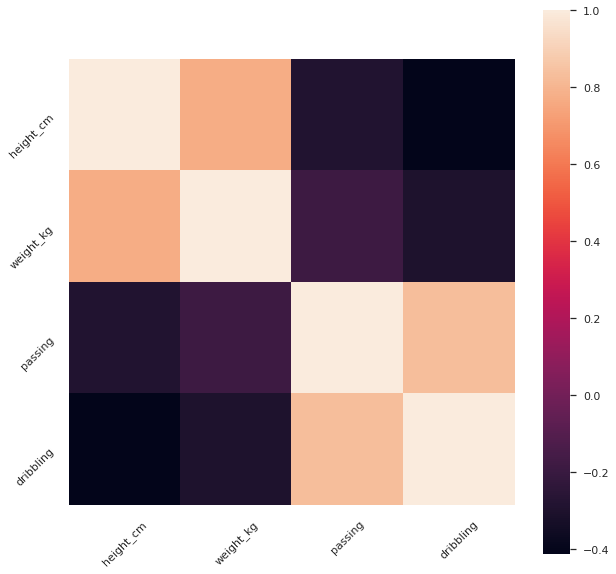

In [0]:
corr = dataset.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
# ax.set_xticklabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [0]:
dataset.groupby('body_type').count()

,height_cm,weight_kg,passing,dribbling
body_type,,,,
Akinfenwa,1,1,1,1
C. Ronaldo,1,1,1,1
Courtois,1,1,0,0
Lean,6505,6505,6043,6043
Messi,1,1,1,1
Neymar,1,1,1,1
Normal,10750,10750,9293,9293
PLAYER_BODY_TYPE_25,1,1,1,1
Shaqiri,1,1,1,1


**DATA BODY TYPE**

Mengganti data body_type dari String menjadi int


In [0]:
dataset = dataset.replace(to_replace ="Stocky", value =0)
dataset = dataset.replace(to_replace ="Normal", value =1)
dataset = dataset.replace(to_replace ="Lean", value =2)

In [0]:
index = dataset[(dataset['body_type'] != 0)&(dataset['body_type'] != 1)&(dataset['body_type'] != 2)].index
dataset.drop(index, inplace=True)
dataset.shape

(18271, 5)

**DATA HEIGHT DAN WEIGHT**

Meminimalisir data  outlier

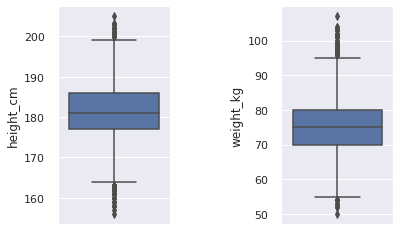

In [0]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dataset["height_cm"], ax=axes[0])
sns.boxplot(y=dataset["weight_kg"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
index = dataset[(dataset['height_cm'] >= 200)|(dataset['height_cm'] <= 163)].index
dataset.drop(index, inplace=True)
dataset.shape

(18182, 5)

In [0]:
index = dataset[(dataset['weight_kg'] >= 95)|(dataset['weight_kg'] <= 54)].index
dataset.drop(index, inplace=True)
dataset.shape

(18092, 5)

(18092, 5)

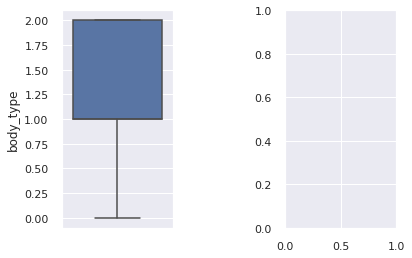

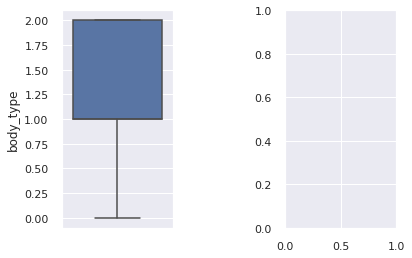

In [0]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dataset["body_type"], ax=axes[0])
plt.subplots_adjust(wspace=1)

**DATA Passing dan Dribbling**

Meminimalisir data  outlier dan data null

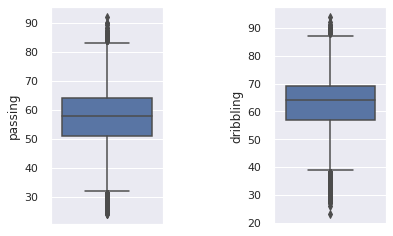

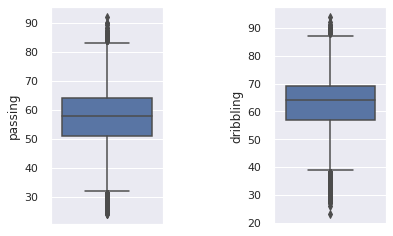

In [0]:
f, axes = plt.subplots(1, 2)
sns.boxplot(y=dataset["passing"], ax=axes[0])
sns.boxplot(y=dataset["dribbling"], ax=axes[1])
plt.subplots_adjust(wspace=1)

Mendrop data passing outlier

In [0]:
index = dataset[(dataset['passing'] >= 84)|(dataset['passing'] <= 32)].index
dataset.drop(index, inplace=True)
dataset.shape
dataset.head()

,height_cm,weight_kg,passing,dribbling,body_type
3,188,87,NaN,NaN,1
6,187,85,NaN,NaN,1
7,193,92,70.0,71.0,1
10,178,73,78.0,90.0,1
11,187,89,54.0,67.0,1


,height_cm,weight_kg,passing,dribbling,body_type
3,188,87,NaN,NaN,1
6,187,85,NaN,NaN,1
7,193,92,70.0,71.0,1
10,178,73,78.0,90.0,1
11,187,89,54.0,67.0,1


Mendrop data dribbling oulier

In [0]:
index = dataset[(dataset['dribbling'] >= 87)|(dataset['dribbling'] <= 43)].index
dataset.drop(index, inplace=True)
dataset.shape

(17047, 5)

(17047, 5)

Mengisi data nan dengan data means dari kolom passing dan dribbling

In [0]:
dataset.passing.fillna(dataset.passing.median(), inplace=True)
dataset.dribbling.fillna(dataset.dribbling.median(), inplace=True)
dataset.shape

(17047, 5)

(17047, 5)

**FIX DATASET**

Dataset yang sudah di minimalisir dari outlier dan null dimasukkan ke variabel dataset baru

In [0]:
dataset = dataset[["height_cm","weight_kg","passing","dribbling","body_type"]]
dataset.head()

,height_cm,weight_kg,passing,dribbling,body_type
3,188,87,59.0,64.0,1
6,187,85,59.0,64.0,1
7,193,92,70.0,71.0,1
11,187,89,54.0,67.0,1
12,188,89,79.0,81.0,1


,height_cm,weight_kg,passing,dribbling,body_type
3,188,87,59.0,64.0,1
6,187,85,59.0,64.0,1
7,193,92,70.0,71.0,1
11,187,89,54.0,67.0,1
12,188,89,79.0,81.0,1


# **KLASIFIKASI 1**



**MENENTUKAN LABEL**

Label yg dipakai ("body_type") dan fitur yang dipakai ("passing" dan "dribbling")

In [0]:
label1 = dataset['body_type'].tolist()
fitur1 = dataset.drop(columns=["passing","dribbling","body_type"])
fitur1.head()

,height_cm,weight_kg
3,188,87
6,187,85
7,193,92
11,187,89
12,188,89


,height_cm,weight_kg
3,188,87
6,187,85
7,193,92
11,187,89
12,188,89


**SPLIT DATASET**

Mensplit dataset dan label yang akan dipakai dengan datatrain : 70% dan datates : 30%

In [0]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(fitur1, label1, test_size=0.3, random_state = 0)

**PROSES TRAINING**

Pembuktian dengan metode yang dipakai yaitu Naive Bayes

In [0]:
model = GaussianNB()
model.fit(x_train1,y_train1)

y_predict1 = model.predict(x_test1)
y_predict1

array([1, 2, 2, ..., 1, 1, 1])

array([1, 2, 2, ..., 1, 1, 1])

Confusion matriks

In [0]:
y_actu1 = pd.Series(y_test1, name='Actual')
y_pred1 = pd.Series(y_predict1, name='Predicted')
fitur1_confusion = pd.crosstab(y_actu1, y_pred1)

fitur1_confusion

Predicted,1,2
Actual,,
0,233,40
1,2362,642
2,1129,709


Predicted,1,2
Actual,,
0,233,40
1,2362,642
2,1129,709


In [0]:
print(classification_report(y_test1,y_predict1,labels=np.unique(y_predict1)))

              precision    recall  f1-score   support

           1       0.63      0.79      0.70      3004
           2       0.51      0.39      0.44      1838

   micro avg       0.60      0.63      0.62      4842
   macro avg       0.57      0.59      0.57      4842
weighted avg       0.59      0.63      0.60      4842

              precision    recall  f1-score   support

           1       0.63      0.79      0.70      3004
           2       0.51      0.39      0.44      1838

   micro avg       0.60      0.63      0.62      4842
   macro avg       0.57      0.59      0.57      4842
weighted avg       0.59      0.63      0.60      4842



In [0]:
print("Akurasi Model : ",metrics.accuracy_score(y_test1,y_predict1))

Akurasi Model :  0.6003910068426197
Akurasi Model :  0.6003910068426197


# **KLASIFIKASI 2**

**MENENTUKAN LABEL**

Label yg dipakai ("body_type") dan fitur yang dipakai ("height_cm" dan "weight_kg")

In [0]:
label2 = dataset['body_type'].tolist()
fitur2 = dataset.drop(columns=["height_cm","weight_kg","body_type"])
fitur2.head()

,passing,dribbling
3,59.0,64.0
6,59.0,64.0
7,70.0,71.0
11,54.0,67.0
12,79.0,81.0


,passing,dribbling
3,59.0,64.0
6,59.0,64.0
7,70.0,71.0
11,54.0,67.0
12,79.0,81.0


**SPLIT DATASET**

Mensplit dataset dan label yang akan dipakai dengan datatrain : 70% dan datates : 30%

In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(fitur2, label2, test_size=0.3, random_state = 0)

**PROSES TRAINING**

Pembuktian dengan metode yang dipakai yaitu Naive Bayes

In [0]:
model = GaussianNB()
model.fit(x_train2,y_train2)

y_predict2 = model.predict(x_test2)

y_predict2

array([1, 1, 1, ..., 1, 1, 1])

array([1, 1, 1, ..., 1, 1, 1])

Confusion matriks

In [0]:
y_actu2 = pd.Series(y_test2, name='Actual')
y_pred2 = pd.Series(y_predict2, name='Predicted')
fitur2_confusion = pd.crosstab(y_actu2, y_pred2)

fitur2_confusion



Predicted,1,2
Actual,,
0,267,6
1,2955,49
2,1792,46


Predicted,1,2
Actual,,
0,267,6
1,2955,49
2,1792,46


In [0]:
print(classification_report(y_test2,y_predict2,labels=np.unique(y_predict2)))

              precision    recall  f1-score   support

           1       0.59      0.98      0.74      3004
           2       0.46      0.03      0.05      1838

   micro avg       0.59      0.62      0.60      4842
   macro avg       0.52      0.50      0.39      4842
weighted avg       0.54      0.62      0.48      4842

              precision    recall  f1-score   support

           1       0.59      0.98      0.74      3004
           2       0.46      0.03      0.05      1838

   micro avg       0.59      0.62      0.60      4842
   macro avg       0.52      0.50      0.39      4842
weighted avg       0.54      0.62      0.48      4842



In [0]:
print("Akurasi Model : ",metrics.accuracy_score(y_test2,y_predict2))

Akurasi Model :  0.5867057673509286
Akurasi Model :  0.5867057673509286


# **CLUSTERING 1**

**DATASET CLUSTERING 1**

Menentukan dataset yang akan dipakai pada clustering 

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv')
cluster = dataset[["passing","dribbling"]]
cluster.describe()

,passing,dribbling
count,16242.000000,16242.000000
mean,57.233777,62.531585
std,10.407844,10.284950
min,24.000000,23.000000
25%,50.000000,57.000000
50%,58.000000,64.000000
75%,64.000000,69.000000
max,92.000000,96.000000


,passing,dribbling
count,16242.000000,16242.000000
mean,57.233777,62.531585
std,10.407844,10.284950
min,24.000000,23.000000
25%,50.000000,57.000000
50%,58.000000,64.000000
75%,64.000000,69.000000
max,92.000000,96.000000


Drop Data outlier

In [0]:
index = cluster[(cluster['passing'] >= 84)|(cluster['passing'] <= 32)].index
cluster.drop(index, inplace=True)
cluster.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,passing,dribbling
1,82.0,89.0
3,NaN,NaN
6,NaN,NaN
7,70.0,71.0
9,81.0,89.0


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,passing,dribbling
1,82.0,89.0
3,NaN,NaN
6,NaN,NaN
7,70.0,71.0
9,81.0,89.0


Mengganti data nan dengan nilai mean

In [0]:
cluster.passing.fillna(cluster.passing.median(), inplace=True)
cluster.dribbling.fillna(cluster.dribbling.median(), inplace=True)
cluster.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,passing,dribbling
1,82.0,89.0
3,58.0,64.0
6,58.0,64.0
7,70.0,71.0
9,81.0,89.0


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,passing,dribbling
1,82.0,89.0
3,58.0,64.0
6,58.0,64.0
7,70.0,71.0
9,81.0,89.0


**K DENGAN METODE K MEANS**

Menentukan nilai K dengan metode K Means dengan melihat grafik yang mendekati nilai distortion linier pada setiap K

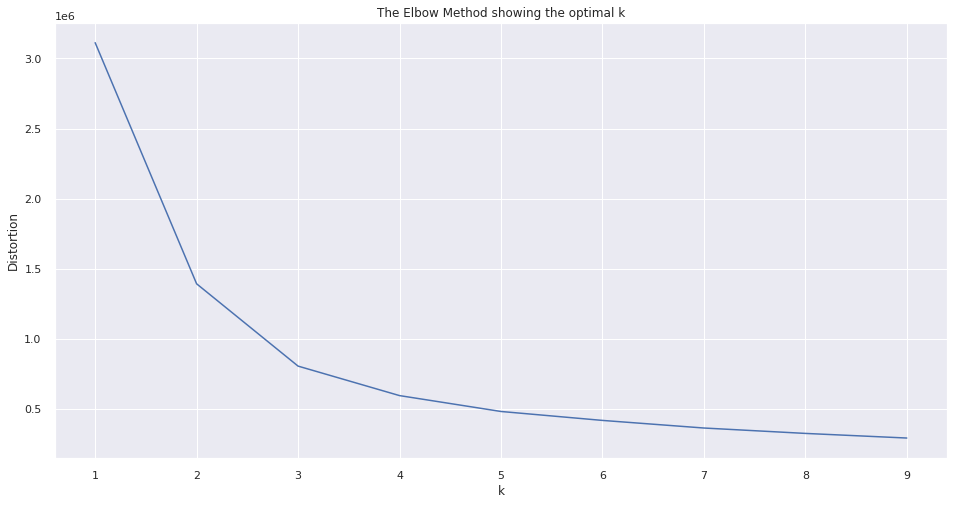

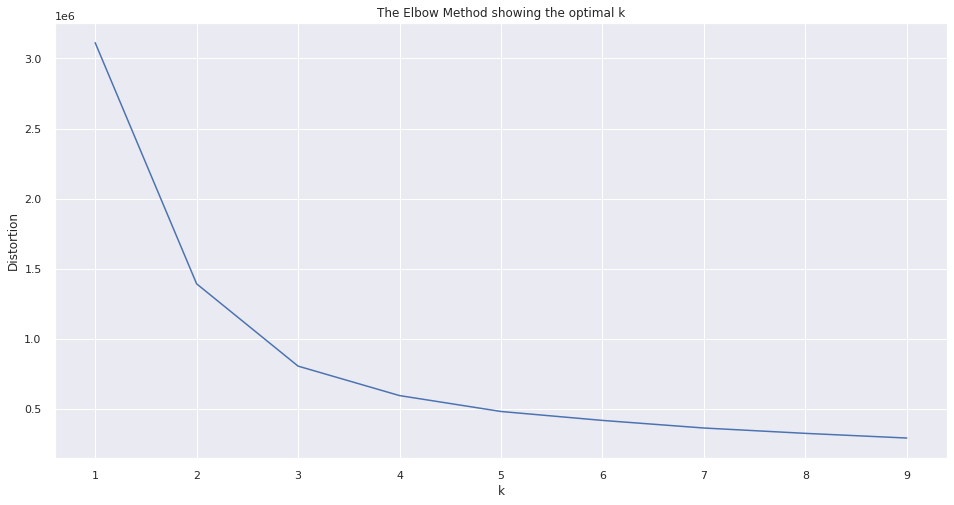

In [0]:
distortions = []
K = range(1,10)
for k in K:
    #fit data dengan 3 cluster
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**CENTROID CLUSTERING**

Membuat centroid sebanyak nilai k dengan random angka posisi x dan y dari 30 - 100, karena data pada clustering yang dipakai tidak kurang dari 30 dan tidak lebih dari 100


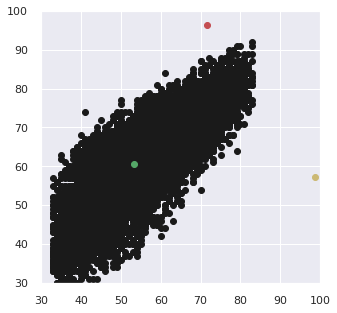

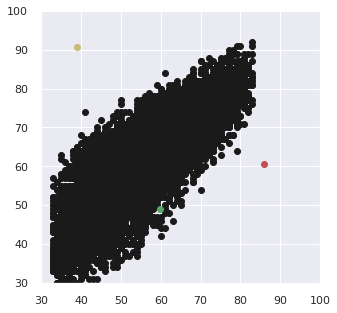

In [0]:
k = 3
# centroid[i] = [x, y]
x,y = [],[]
for i in range(k):
  x.append(round(np.random.uniform(30, 100),2))
  y.append(round(np.random.uniform(30, 100),2))
x,y
centroid = {
  i+1: [x[i],y[i]]
  for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster["passing"], cluster["dribbling"], color="k")
colmap = {1: "r", 2: "y", 3: "g"}
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**HITUNG CENTROID**

Menghitung jarak antara setiap centroid dengan setiap data, dan memberikan warna untuk data yang terdekat dengan centroidnya 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

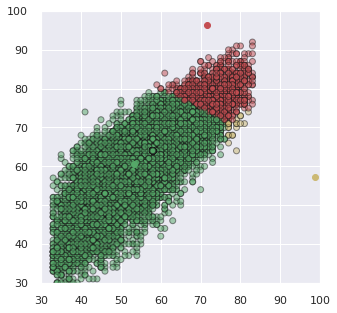

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color
1,82.0,89.0,12.867451,35.796012,40.496762,1,r
3,58.0,64.0,35.185385,41.295696,5.925175,3,g
6,58.0,64.0,35.185385,41.295696,5.925175,3,g
7,70.0,71.0,25.525895,31.826318,19.798679,3,g
9,81.0,89.0,12.067779,36.274984,39.791553,1,r
...,...,...,...,...,...,...,...
18272,58.0,64.0,35.185385,41.295696,5.925175,3,g
18274,33.0,35.0,72.555850,69.460741,32.556531,3,g
18275,44.0,45.0,58.378860,56.139776,18.054022,3,g
18276,47.0,47.0,55.226726,52.788583,14.887837,3,g


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

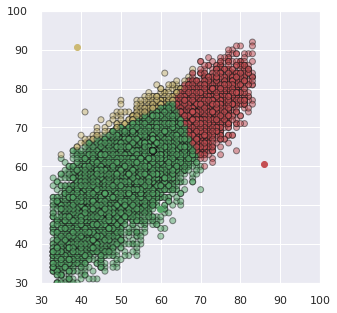

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color
1,82.0,89.0,28.731072,43.062008,45.798072,1,r
3,58.0,64.0,28.007044,32.755099,15.131537,3,g
6,58.0,64.0,28.007044,32.755099,15.131537,3,g
7,70.0,71.0,18.951372,36.733860,24.297806,1,r
9,81.0,89.0,28.880002,42.062769,45.320673,1,r
...,...,...,...,...,...,...,...
18272,58.0,64.0,28.007044,32.755099,15.131537,3,g
18274,33.0,35.0,58.634926,55.979251,30.178194,3,g
18275,44.0,45.0,44.578857,45.936222,16.242641,3,g
18276,47.0,47.0,41.078638,44.392302,12.901295,3,g


In [0]:
# perhitungan jarak dengan centroid sqrt((x1 - x2)^2 - (y1 - y2)^2)
def hitungCentroid(data, centroid):
    for i in centroid.keys():
        data['Jarak_ke_centroid_{}'.format(i)] = (
            np.sqrt((data['passing'] - centroid[i][0]) ** 2 + (data['dribbling'] - centroid[i][1]) ** 2)
        )
    jarakCentroid = ['Jarak_ke_centroid_{}'.format(i) for i in centroid.keys()]
    data['Terdekat'] = data.loc[:, jarakCentroid].idxmin(axis=1)
    data['Terdekat'] = data['Terdekat'].map(lambda x: int(x.lstrip('Jarak_ke_centroid_')))
    data['color'] = data['Terdekat'].map(lambda x: colmap[x])
    return data

cluster = hitungCentroid(cluster, centroid)
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

# print(cluster.head())
cluster

**PERUBAHAN CENTROID**

Melakukan perubahan centroid dari yang lama dengan yang baru

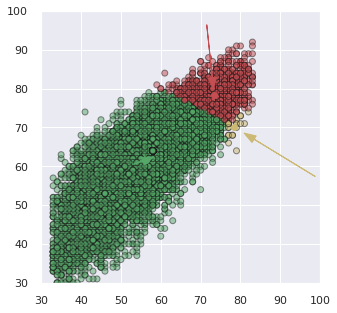

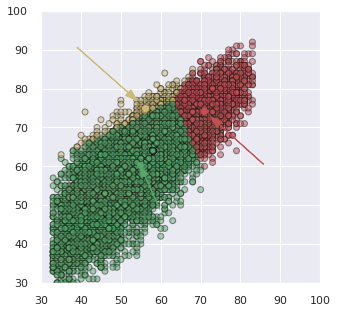

In [0]:
centroid_lama = cp.deepcopy(centroid)

def update(k):
    for i in centroid.keys():
        centroid[i][0] = np.mean(cluster[cluster['Terdekat'] == i]['passing'])
        centroid[i][1] = np.mean(cluster[cluster['Terdekat'] == i]['dribbling'])
    return k
    

centroid = update(centroid)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
for i in centroid_lama.keys():
    x_sebelum = centroid_lama[i][0]
    y_sebelum = centroid_lama[i][1]
    x_sesudah = (centroid[i][0] - centroid_lama[i][0]) * 0.75
    y_sesudah = (centroid[i][1] - centroid_lama[i][1]) * 0.75
    ax.arrow(x_sebelum, y_sebelum, x_sesudah, y_sesudah, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

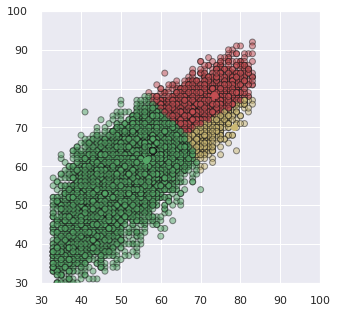

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

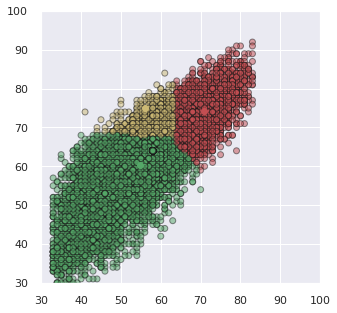

In [0]:
cluster = hitungCentroid(cluster, centroid)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**PERULANGAN PERUBAHAN CENTROID**

Melakukan perubahan sampai posisi centroid tidak berubah lagi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

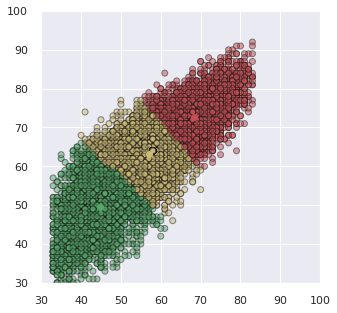

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

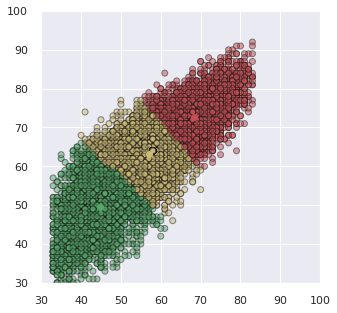

In [0]:
while True:
    centroid_terdekat = cluster['Terdekat'].copy(deep=True)
    centroid = update(centroid)
    cluster = hitungCentroid(cluster, centroid)
    if centroid_terdekat.equals(cluster['Terdekat']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster['passing'], cluster['dribbling'], color=cluster['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**HITUNG SSE**

Menghitung SSE dari data jarak antara centroid dengan cluster yang sudah fix(Centroid yang tidak berubah lagi)

In [0]:
def sse1(data,centroid):
  for i in centroid.keys():
    model = np.sqrt(centroid[i][0] + centroid[i][1])
    data['SSE'] = (model - data["Jarak_ke_centroid_1"]) ** 2
  return data
sse1(cluster,centroid)

for i in centroid.keys():
  SSE1 = (sum(cluster["SSE"]))
print("SSE Clustering 1 : ",SSE1)

SSE Clustering 1 :  2864406.2597493413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


SSE Clustering 1 :  2864406.2597493413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**IMPORT DATA CLUSTERING 1 KE CSV**

In [0]:
cluster.to_csv('1301174308_Hasil_akhir_Clustering 1.csv') 
files.download('1301174308_Hasil_akhir_Clustering 1.csv')
cluster.groupby('color').count()
cluster

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
1,82.0,89.0,NaN,27.020853,48.606695,2,y,NaN
7,70.0,71.0,NaN,6.431475,27.588348,2,y,NaN
9,81.0,89.0,NaN,26.361913,47.918219,2,y,NaN
10,78.0,90.0,NaN,25.348956,46.688246,2,y,NaN
11,54.0,67.0,NaN,10.097440,14.206635,2,y,NaN
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,NaN,28.489194,8.099662,3,g,NaN
18274,33.0,35.0,NaN,45.897169,24.376492,3,g,NaN
18275,44.0,45.0,NaN,31.128104,9.961801,3,g,NaN
18276,47.0,47.0,NaN,27.690818,7.113814,3,g,NaN


# **CLUSTERING 2**

**DATASET CLUSTERING 2**

Menentukan dataset yang akan dipakai pada clustering 

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Tubes/fifa20.csv')
cluster2 = dataset[["passing","dribbling"]]
cluster2.describe()

,passing,dribbling
count,16242.000000,16242.000000
mean,57.233777,62.531585
std,10.407844,10.284950
min,24.000000,23.000000
25%,50.000000,57.000000
50%,58.000000,64.000000
75%,64.000000,69.000000
max,92.000000,96.000000


,passing,dribbling
count,16242.000000,16242.000000
mean,57.233777,62.531585
std,10.407844,10.284950
min,24.000000,23.000000
25%,50.000000,57.000000
50%,58.000000,64.000000
75%,64.000000,69.000000
max,92.000000,96.000000


Drop Data outlier

In [0]:
index = cluster2[(cluster2['passing'] >= 84)|(cluster2['passing'] <= 32)].index
cluster2.drop(index, inplace=True)
cluster2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,passing,dribbling
1,82.0,89.0
3,NaN,NaN
6,NaN,NaN
7,70.0,71.0
9,81.0,89.0


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,passing,dribbling
1,82.0,89.0
3,NaN,NaN
6,NaN,NaN
7,70.0,71.0
9,81.0,89.0


Mendrop baris yang berisi data nan

In [0]:
cluster2.dropna(inplace=True)
cluster2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,passing,dribbling
1,82.0,89.0
7,70.0,71.0
9,81.0,89.0
10,78.0,90.0
11,54.0,67.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,passing,dribbling
1,82.0,89.0
7,70.0,71.0
9,81.0,89.0
10,78.0,90.0
11,54.0,67.0


**K DENGAN METODE K MEANS**

Menentukan nilai K dengan metode K Means dengan melihat grafik yang mendekati nilai distortion linier pada setiap K

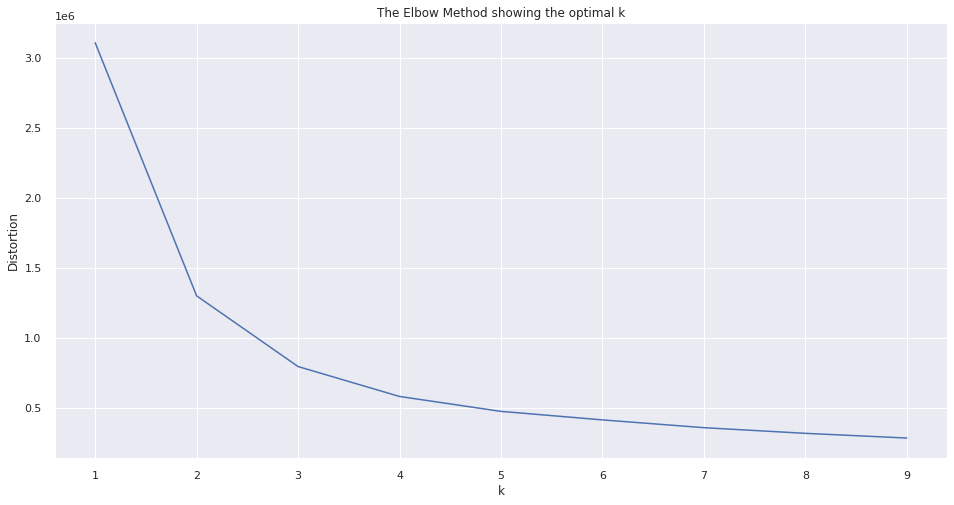

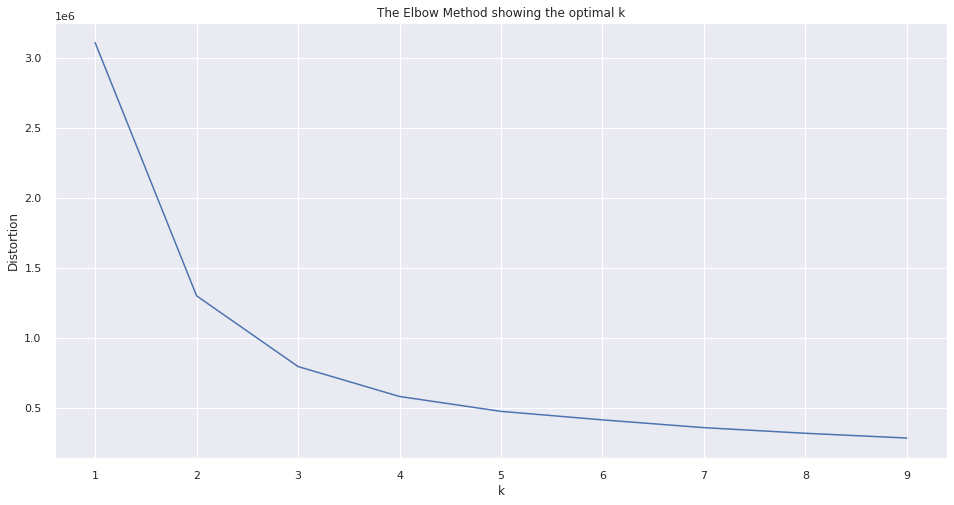

In [0]:
distortions = []
K = range(1,10)
for k in K:
    #fit data dengan 3 cluster
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster2)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**CENTROID CLUSTERING**

Membuat centroid sebanyak nilai k dengan random angka posisi x dan y dari 30 - 100, karena data pada clustering yang dipakai tidak kurang dari 30 dan tidak lebih dari 100

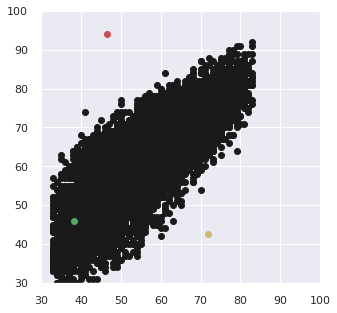

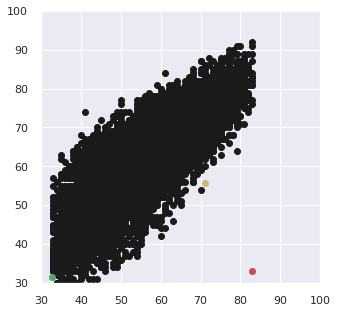

In [0]:
k = 3
# centroid[i] = [x, y]
x,y = [],[]
for i in range(k):
  x.append(round(np.random.uniform(30, 100),2))
  y.append(round(np.random.uniform(30, 100),2))
x,y
centroid = {
  i+1: [x[i],y[i]]
  for i in range(k)
}
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster2["passing"], cluster2["dribbling"], color="k")
colmap = {1: "r", 2: "y", 3: "g"}
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**HITUNG CENTROID**

Menghitung jarak antara setiap centroid dengan setiap data, dan memberikan warna untuk data yang terdekat dengan centroidnya 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

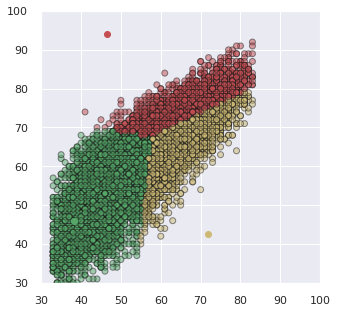

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
1,82.0,89.0,21.248919,35.880531,54.255155,1,r,133.128621
3,58.0,64.0,13.542403,1.230418,19.601699,2,y,14.681328
6,58.0,64.0,13.542403,1.230418,19.601699,2,y,14.681328
7,70.0,71.0,2.313600,15.103988,33.139733,1,r,54.718290
9,81.0,89.0,20.623266,35.193010,53.572202,1,r,119.082330
...,...,...,...,...,...,...,...,...
18272,58.0,64.0,13.542403,1.230418,19.601699,2,y,14.681328
18274,33.0,35.0,51.695826,37.071916,18.712258,3,g,1762.743937
18275,44.0,45.0,36.894210,22.403053,4.669493,3,g,738.938803
18276,47.0,47.0,33.422830,19.070983,3.499728,3,g,562.261256


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

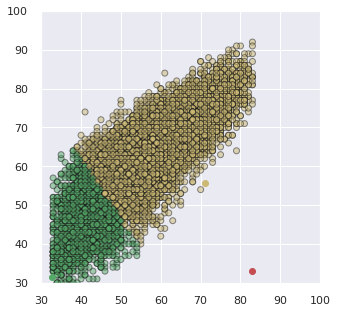

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
1,82.0,89.0,21.248919,35.880531,54.255155,1,r,133.128621
3,58.0,64.0,13.542403,1.230418,19.601699,2,y,14.681328
6,58.0,64.0,13.542403,1.230418,19.601699,2,y,14.681328
7,70.0,71.0,2.313600,15.103988,33.139733,1,r,54.718290
9,81.0,89.0,20.623266,35.193010,53.572202,1,r,119.082330
...,...,...,...,...,...,...,...,...
18272,58.0,64.0,13.542403,1.230418,19.601699,2,y,14.681328
18274,33.0,35.0,51.695826,37.071916,18.712258,3,g,1762.743937
18275,44.0,45.0,36.894210,22.403053,4.669493,3,g,738.938803
18276,47.0,47.0,33.422830,19.070983,3.499728,3,g,562.261256


In [0]:
# perhitungan jarak dengan centroid sqrt((x1 - x2)^2 - (y1 - y2)^2)
def hitungCentroid(data, centroid):
    for i in centroid.keys():
        data['Jarak_ke_centroid_{}'.format(i)] = (
            np.sqrt((data['passing'] - centroid[i][0]) ** 2 + (data['dribbling'] - centroid[i][1]) ** 2)
        )
    jarakCentroid = ['Jarak_ke_centroid_{}'.format(i) for i in centroid.keys()]
    data['Terdekat'] = data.loc[:, jarakCentroid].idxmin(axis=1)
    data['Terdekat'] = data['Terdekat'].map(lambda x: int(x.lstrip('Jarak_ke_centroid_')))
    data['color'] = data['Terdekat'].map(lambda x: colmap[x])
    return data

cluster2 = hitungCentroid(cluster2, centroid)
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster2['passing'], cluster2['dribbling'], color=cluster2['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

# print(cluster.head())
cluster

**PERUBAHAN CENTROID**

Melakukan perubahan centroid dari yang lama dengan yang baru

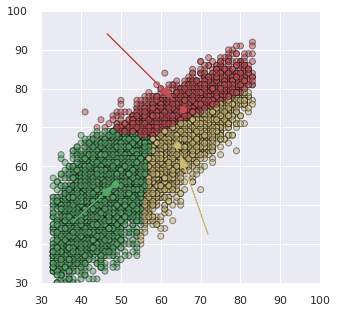

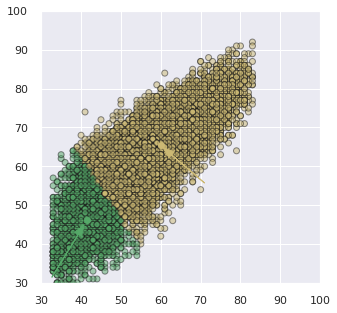

In [0]:
centroid_lama = cp.deepcopy(centroid)

def update(k):
    for i in centroid.keys():
        centroid[i][0] = np.mean(cluster2[cluster2['Terdekat'] == i]['passing'])
        centroid[i][1] = np.mean(cluster2[cluster2['Terdekat'] == i]['dribbling'])
    return k
    

centroid = update(centroid)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(cluster2['passing'], cluster2['dribbling'], color=cluster2['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
for i in centroid_lama.keys():
    x_sebelum = centroid_lama[i][0]
    y_sebelum = centroid_lama[i][1]
    x_sesudah = (centroid[i][0] - centroid_lama[i][0]) * 0.75
    y_sesudah = (centroid[i][1] - centroid_lama[i][1]) * 0.75
    ax.arrow(x_sebelum, y_sebelum, x_sesudah, y_sesudah, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

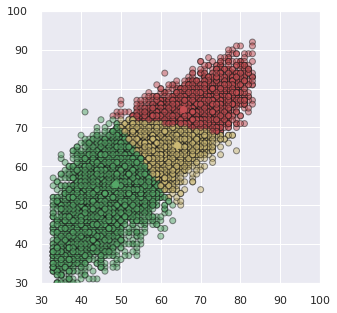

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

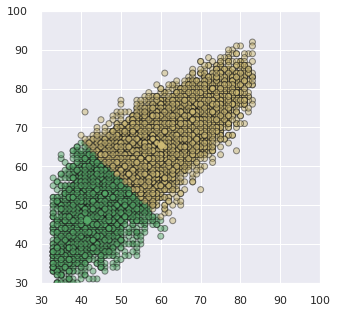

In [0]:
cluster = hitungCentroid(cluster2, centroid)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster2['passing'], cluster2['dribbling'], color=cluster2['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**PERULANGAN PERUBAHAN CENTROID**

Melakukan perubahan sampai posisi centroid tidak berubah lagi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

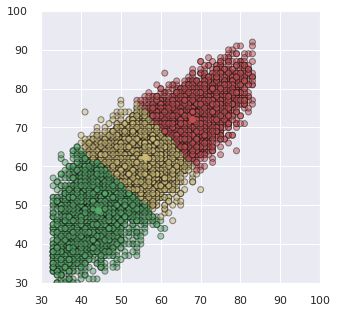

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

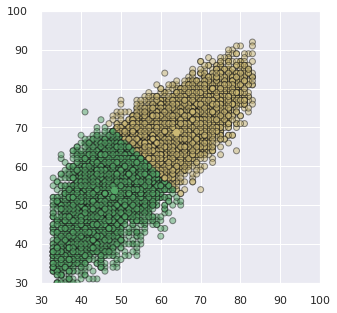

In [0]:
while True:
    centroid_terdekat = cluster2['Terdekat'].copy(deep=True)
    centroid = update(centroid)
    cluster2 = hitungCentroid(cluster2, centroid)
    if centroid_terdekat.equals(cluster2['Terdekat']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(cluster2['passing'], cluster2['dribbling'], color=cluster2['color'], alpha=0.5, edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i], color=colmap[i])
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.show()

**HITUNG SSE**

Menghitung SSE dari data jarak antara centroid dengan cluster yang sudah fix(Centroid yang tidak berubah lagi)

In [0]:
def sse2(data,centroid):
  for i in centroid.keys():
    model = np.sqrt(centroid[i][0] + centroid[i][1])
    data['SSE'] = (model - data["Jarak_ke_centroid_1"]) ** 2
  return data
sse2(cluster2,centroid)

for i in centroid.keys():
  SSE2 = (sum(cluster2["SSE"]))
print("SSE Clustering 2 : ",SSE2)

SSE Clustering 2 :  2669165.759120117


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


SSE Clustering 2 :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**IMPORT DATA CLUSTERING 2 KE CSV**

In [0]:
cluster2.to_csv('1301174308_Hasil_akhir_Clustering 2.csv') 
files.download('1301174308_Hasil_akhir_Clustering 2.csv')
cluster2.groupby('color').count()
cluster

,passing,dribbling,Jarak_ke_centroid_1,Jarak_ke_centroid_2,Jarak_ke_centroid_3,Terdekat,color,SSE
1,82.0,89.0,NaN,27.020853,48.606695,2,y,NaN
7,70.0,71.0,NaN,6.431475,27.588348,2,y,NaN
9,81.0,89.0,NaN,26.361913,47.918219,2,y,NaN
10,78.0,90.0,NaN,25.348956,46.688246,2,y,NaN
11,54.0,67.0,NaN,10.097440,14.206635,2,y,NaN
...,...,...,...,...,...,...,...,...
18271,47.0,46.0,NaN,28.489194,8.099662,3,g,NaN
18274,33.0,35.0,NaN,45.897169,24.376492,3,g,NaN
18275,44.0,45.0,NaN,31.128104,9.961801,3,g,NaN
18276,47.0,47.0,NaN,27.690818,7.113814,3,g,NaN
